<a href="https://colab.research.google.com/github/JuanJGalindo/ML-Theory/blob/main/Tarea7/3_Introduccion_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Procesamiento de secuencias con redes neuronales recurrentes**

- En general, muchos problemas en ciencia de datos, requieren del procesado de datos secuenciales, generalmente asociados al tiempo (Series de Tiempo).

- En ese sentido, sea la serie de datos $\{x_t\in\mathbb{R}\}_{t=1}^T$.

- Suponga que se define el modelo predictivo probabilístico de la forma:

$$x_t \sim P(x_t|x_{t-1},\dots,x_1)$$

- En general, el estudio de datos secuenciales se puede atacar desde dos aproximaciones básicas: i) modelos autorregresivos , y ii) modelos autorregresivos de variable latente.

#**Modelos autorregresivos**

- Dichos modelos fijan una dependencia temporal de orden $\tau$.

- Por ende, el número de puntos requeridos para realizar predicciones para $t > \tau$ se mantiene fijo, dado que se asume:

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

#**Modelos autorregresivos de variable latente**

- Buscan preservar alguna representación latente (memoría) $h_t$ de las observaciones pasadas, y busca actualizar (predecir) la secuencia $x_t$ y la variable latente $h_t$, de la forma:

$$\hat{x}_t = P(x_t|h_t)$$

$$h_t = g(h_{t-1},x_{t-1})$$

![autorregresivo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/autorregresivo.png?raw=1)

**Nota**: $h_t$ no es observable (latente), por ende debe estimarse desde los datos.

- En estadística, el concepto de dinámica que no cambia (patrón regular) se conoce como estacionario. En este sentido, podemos tener un estimado de la secuencia completa utilizando un modelo probabilístico de la forma:

$$P(x_1,x_2,\dots,x_T) = \prod^T_{t=1}P(x_t|x_{t-1},\dots,x_1)$$
Donde el estimado de la probabilidad condicional se puede realizar mediante regresores o clasificadores para eventos continuos o discretos, respectivamente.



#**Modelos Markovianos**

- En los modelos autorregresivos la estimación de $x_t$ se basa en una ventana de tamaño $\tau$, de la forma $x_{t-1},\dots,x_{t-\tau}$.

- Para cuando dicha aproximación es correcta, se dice que la secuencia de datos cumple con la condición Markoviana.

- Para $\tau=1$, se tiene un modelo de Markov de primer orden:

$$P(x_1,x_2,\dots,x_T)=\prod_{t=1}^T P(x_t|x_{t-1})$$
con $P(x_1|x_0)=P(x_1).$





#**Ejercicio 1:**

- Consultar el modelo y principio de optimización de los modelos de media móvil ([Moving average - MA](https://en.wikipedia.org/wiki/Moving-average_model)), autorregresivos de media móvil ([Autorregresive moving average - ARMA](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)) y autorregresivo integrado de media móvil ([Autoregressive integrated moving average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)). Cuáles son sus relaciones con los modelos Markovianos?.
---
###**Modelos de Media Móvil (MA)**
**Principio de Modelado:**

El valor actual $X_t$ depende de una cantidad finita de errores pasados (ruido blanco):
$$X_t = \mu + \varepsilon_t + \theta_1\varepsilon_{t-1}+\dots+\theta_q\varepsilon_{t-q}$$
Modela las correlaciones de corto plazo causadas por choques aleatorios y es inherentemente **estacionario**.

**Principio de Optimización:**

- Los parámetros $\theta_i$ se estiman mediante **Máxima Verosimilitud (MLE)** bajo ruido blanco gaussiano o **Mínimos Cuadrados** aplicado a las autocorrelaciones residuales.

- La Función de Autocorrelación (ACF) se anula después del rezago $q$, útil para determinar el orden.


**Relación con Modelos Markovianos:**

No es Markoviano en las observaciones, ya que depende de errores pasados no observables, sin embargo, Puede representarse como un proceso de Markov oculto, donde los estados ocultos son los errores (ruidos) pasados.

---
###**Modelos Autorregresivos (AR)**
**Principio de Modelado:**

El valor actual depende de sus valores pasados más un término de error:

$$X_t = \mu + \phi_1X_{t-1} + \phi_2X_{t-2}+\dots+\phi_pX_{t-p} + \varepsilon_t$$

Captura la inercia temporal o la memoria de los estados anteriores y es estacionario si las raíces del polinomio característico están fuera del círculo unitario.

**Principio de Optimización:**

- Los parámetros $\theta_i$ se estiman mediante **Máxima Verosimilitud (MLE)** o **Mínimos Cuadrados** para minimizar la varianza de los residuos. También se estiman mediante **Ecuaciones de Yule-Walker**.
- El orden $p$ se identifica a través de la **PACF** (Función de Autocorrelación Parcial) y criterios **AIC/BIC**.


**Relación con Modelos Markovianos:**

Un $AR(p)$ es un **proceso de Markov de orden p**:
$$P(x_1,x_2,\dots,x_p)=\prod_{t=1}^T P(x_t|x_{t-1},x_{t-2},\dots,x_{t-p})$$
El futuro depende únicamente de los últimos $p$ estados, por lo que es un **Proceso de Markov de Memoria Finita**.

---
###**Modelos Autorregresivos de Media Móvil(ARMA)**
**Principio de Modelado:**

Combina dependencia de estados pasados (AR) y choques pasados (MA):

$$X_t = \mu + \varepsilon + \sum_{i=1}^{p}\phi_iX_{t-i} + \sum_{j=1}^{1}\theta_j\varepsilon_{t-q} $$

Representa **procesos estacionarios lineales** que equilibran memoria determinista y estocástica.

**Principio de Optimización:**

-Estimación de parámetros mediantes **MLE o mínimos cuadrados iterativo**, con restricciones de **estacionariedad** (AR) e **invertibilidad** (MA).
El orden $(p, q)$ se elige por **AIC/BIC** ó **Análisis de Residuos**.


**Relación con Modelos Markovianos:**

No es Markoviano en el espacio observable (depende de errores ocultos). Puede expresarse como un **Proceso de Markov en Espacio Latente**, incluyendo observaciones y errores pasados.

---
###**Modelo Autorregresivo Integrado de Media Móvil(ARMA)**
**Principio de Modelado:**

Extiende **ARMA** para series no estacionarias, aplicando diferenciación:

$$(1-B)^dX_t = ARMA(p,q)$$

Donde $B$ es el operador de rezago.

El componente integrado elimina tendencias o caminatas aleatorias y modela tanto el comportamiento determinista (tendencias) como el aleatorio (ruido).


**Principio de Optimización:**

Estimación de parámetros $(p,q,d)$ mediante:
- Análisis ACF/PACF,
- Criterios AIC/BIC o búsqueda automatizada.
- MLE o mínimos cuadrados condicionales.

Se exige **estacionariedad** e **invertibilidad** tras la diferenciación.


**Relación con Modelos Markovianos:**

No es Markoviano en la serie original, pero sí lo es en la **serie diferenciada**.

Puede representarse como un **modelo lineal de espacio de estados**, es decir, **Markoviano en el espacio latente**.




#**Redes neuronales recurrentes - Recurrent neural networks (RNN)**

- Hasta el momento hemos trabajado con datos estructurados tipo tabla, en donde las muestras se asumen independientes e identicamente distribuidas (i.i.d.).

- Sin embargo, para datos secuenciales, la suposición i.i.d no es apropiada, y se requiren de arquitecturas que codifiquen dicha secuencialidad.

- Por ejemplo, en el caso de datos tipo imagen, la relación espacial debe ser codificada apropiadamente, como en el caso de las arquitecturas convolucionales ([Convolutional Neural Networks](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)).

- En este sentido, las RNN pretenden explotar la codificación mediante variables latentes, para aproximar el modelado de la incertidumbre de la secuencia como:


$$P(x_t|x_{t-1},\dots,x_1)\approx P(x_t|h_{t-1})$$

donde el estado oculto $h_{t-1}$ (hidden state) codifica la información relevante de la secuencia hasta $t-1$.

- Además, el estado oculto en $t$ se puede calcular a partir de $x_t$ y $h_{t-1},$ como:

$$h_t=f(x_t,h_{t-1})$$

**Nota**: se podría utilizar como $h_t$ todo el vector de datos $x_t,x_{t-1},\dots,x_1$; no obstante, el costo computacional y de memoría sería muy alto.

##**Las RNN son redes neuronales con estados ocultos!**

- Considere una matriz (mini-lote) de $P$ características desde datos secuenciales $\mathbf{X}_t\in\mathbb{R}^{N\times P}$, es decir, tenemos $N$ trayectorias con $P$ mediciones de una secuencia en el instante $t$.

- Sea $\mathbf{H}_t\in\mathbb{R}^{N \times h}$ la variable oculta (latente) para el instante $t$, la estimación de dicha variable respecto a la entrada actual y a la variable oculta en $t-1$ se puede modelar mediante RNN como:

$$\mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}+\mathbf{H}_{t-1}\mathbf{S} + \mathbf{b}),$$

donde $\mathbf{W}\in\mathbb{R}^{P \times h},$ $\mathbf{S}\in\mathbb{R}^{h \times h},$ $\mathbf{b}\in\mathbb{R}^{h}$ y $\phi(\cdot)$ es una función de activación no lineal.

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto de la forma:

$$\mathbf{O}_t = \mathbf{H}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$

**Esquema de una RNN con un estado oculto:**

![rnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn.png?raw=1)



- A continuación se presenta algunos ejemplos sobre Tensorflow para RNN.

In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#-------------------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
#
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#-------------------------------------------------------------------------------

Generamos el conjunto de series de tiempo a analizar

In [2]:
#-------------------------------------------------------------------------------
# definimos función para generar señales 1D-------------------------------------
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time   = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)
#-------------------------------------------------------------------------------

In [3]:
#-------------------------------------------------------------------------------
# definimos número de steps y batch_size----------------------------------------
n_steps    = 50
batch_size = 10000
#-------------------------------------------------------------------------------
series           = generate_time_series(batch_size, n_steps + 1)
print('Series dimension:',series.shape)
#-------------------------------------------------------------------------------
# partimos en conjuntos de train/valid/test-------------------------------------
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, y_train.shape)
print('Valid dimensions:',X_valid.shape, y_valid.shape)
print('Test dimensions:',X_test.shape, y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 51, 1)
Train dimensions: (7000, 50, 1) (7000, 1)
Valid dimensions: (2000, 50, 1) (2000, 1)
Test dimensions: (1000, 50, 1) (1000, 1)


$[y_{t+P},\dots,y_{t}] = f(y_{t-1},\dots,y_{t-\tau},x_{t},x_{t-1},\dots,x_{t-\tau})$

In [4]:
#-------------------------------------------------------------------------------
y_train # vector de salida
#-------------------------------------------------------------------------------

array([[-0.35489398],
       [ 0.11629631],
       [-0.35395944],
       ...,
       [ 0.04946356],
       [-0.26231018],
       [ 0.60062087]], dtype=float32)

Generamos la gráfica de las series de tiempo creadas

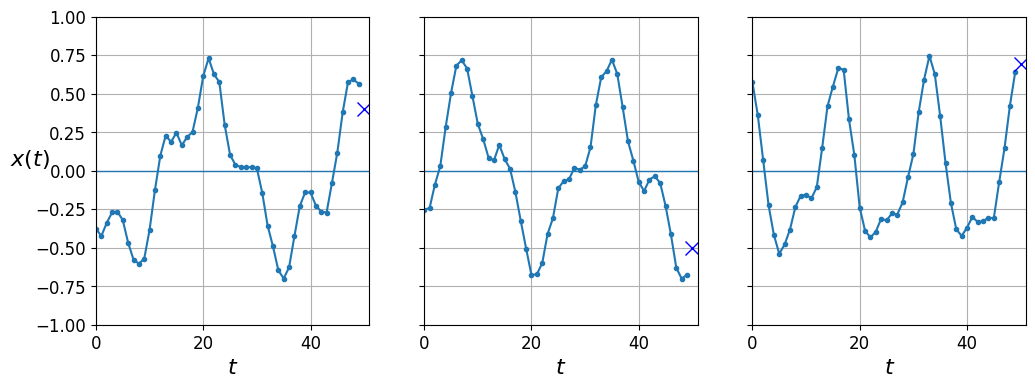

In [5]:
#-------------------------------------------------------------------------------
# definimos función para graficar las series------------------------------------
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
#-------------------------------------------------------------------------------
# graficamos 3 series del set validation----------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()
#-------------------------------------------------------------------------------

#**Predicción ingenua (solo predecir el último valor):**

- Para ilustrar el concepto de secuencialidad, utilizaremos un predictor ingenuo, en donde la salida actual sería igual al valor en el instante anterior:

$$x_t = x_{t-1}$$

In [6]:
#-------------------------------------------------------------------------------
# asumimos que el valor ha estimar es el último elemento de la serie----------------
y_pred = X_test[:, -1]
#-------------------------------------------------------------------------------
# calculamos el MSE entre el y_valid vs. y_pred---------------------------------

print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

MSE: 2.1811275 %


- El error cálculado no es tan grande aparentemente.

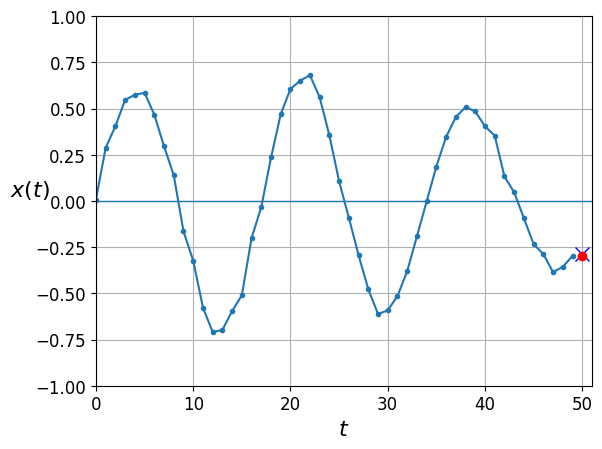

In [7]:
#-------------------------------------------------------------------------------
# graficamos valor estimado----------------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

#**Predicción lineal**

- Ahora utilizaremos un modelo lineal simple.

- Recuerde que como generamos ventanas, podrimos entender esta aproximación como un modelo autorregresivo simple (sin variables latentes):

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

donde la estimación de la condicional se realiza mediante un regresor con capas densas.



$\mathbf{X}=[\mathbf{x}_n]\in \mathbb{R}^{N \times P}$

$\mathbf{x}_n =[y_{n-1},y_{n-2},\dots, y_{n-\tau}]$

$\mathbf{y}\in \mathbb{R}^T$

$f(\mathbf{x}_n)=\mathbf{x}_n\mathbf{w}=x_{n1}w_1+\dots+x_{nP}w_P$

$f(\mathbf{x}_n)= y_{n-1}w_1+\dots+y_{n-\tau}w_P = \hat{y}_n$

$P = \tau$

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

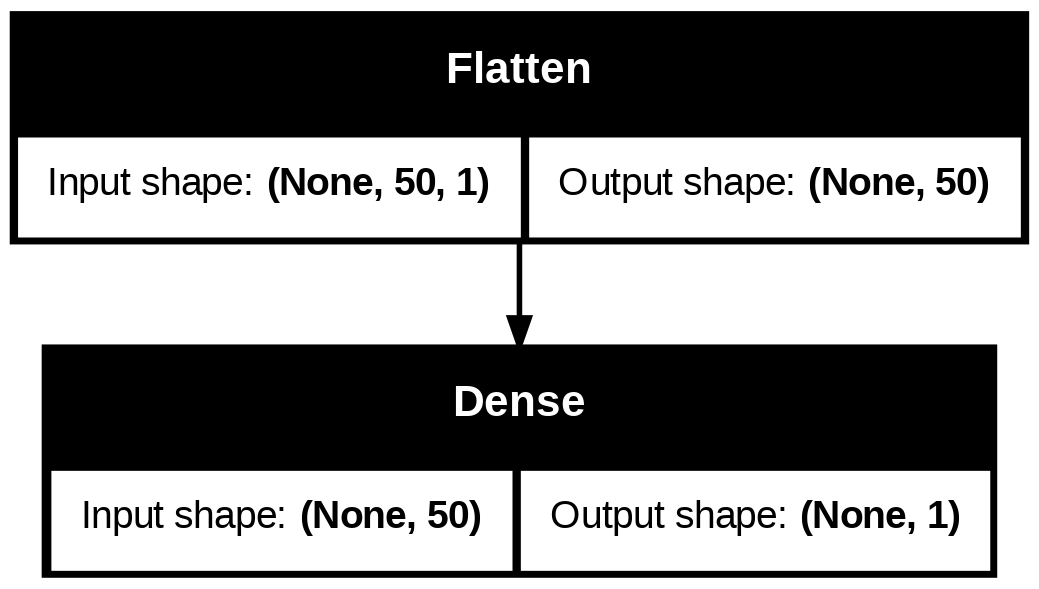

In [8]:
#-------------------------------------------------------------------------------
# definimos un modelo secuencial------------------------------------------------
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
#-------------------------------------------------------------------------------
model.summary()
#-------------------------------------------------------------------------------
keras.utils.plot_model(model, "my_model_series.png", show_shapes=True)
#-------------------------------------------------------------------------------

Compilamos y ajustamos el modelo usando los datos de train y validation

In [9]:
epochs = 20
#-------------------------------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2023 - val_loss: 0.0500
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0404 - val_loss: 0.0226
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0198 - val_loss: 0.0133
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0123 - val_loss: 0.0095
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0078 - val_loss: 0.0072
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [10]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MSE: 0.4062935 %


El resultado es mucho mejor que el predictor ingenuo.

Graficamos el desempeño del modelo secuencial

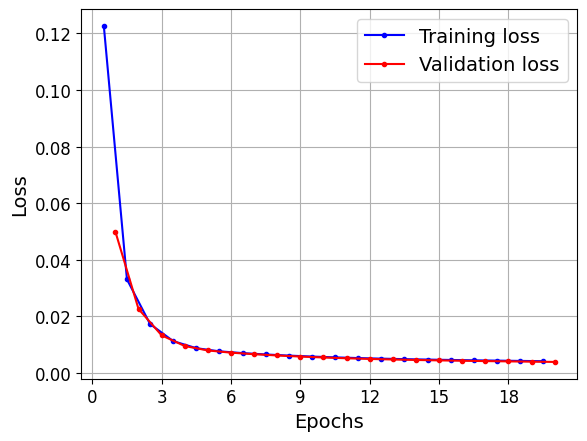

In [11]:
#-------------------------------------------------------------------------------
# definimos una función para plot de curvas de aprendizaje----------------------
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
#-------------------------------------------------------------------------------
# llamamos función de plot------------------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

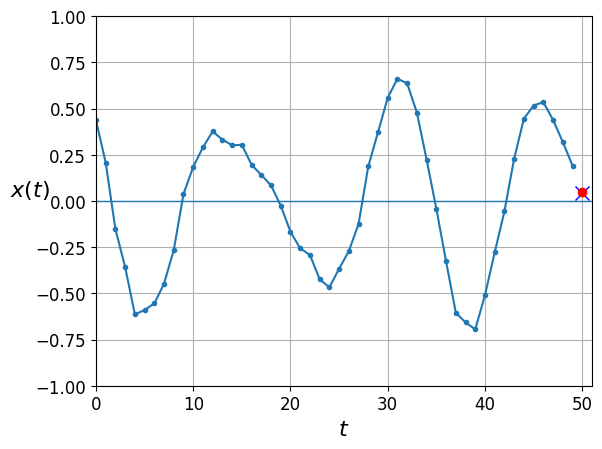

In [12]:
#-------------------------------------------------------------------------------
# pintamos series y predicciones------------------------------------------------
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()
#-------------------------------------------------------------------------------

#**Predicciones con RNN**

- Keras tiene implementado las [capas simples de RNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/).

- Por defecto la activación no lineal utilizada es la `tanh`, aunque se puede trabajar con las vistas en módulos anteriores.

- En este caso se define una única capa RNN con una neurona, dado que tenemos una única salida a predecir.

In [13]:
#-------------------------------------------------------------------------------
# definimos modelo secuencial de RNN simple-------------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1], )
])
#-------------------------------------------------------------------------------
# compilamos el modelo RNN------------------------------------------------------
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
#-------------------------------------------------------------------------------
# entrenamos el modelo y lo ajustamos con los datos de valid--------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0526 - val_loss: 0.0134
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0125 - val_loss: 0.0113
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0

In [14]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
MSE: 1.1328241 %


Graficamos el performance de la Simple RNN

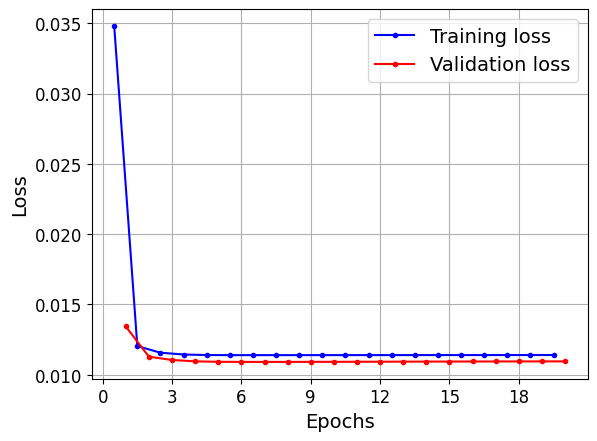

In [15]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

Se analiza la predicción

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


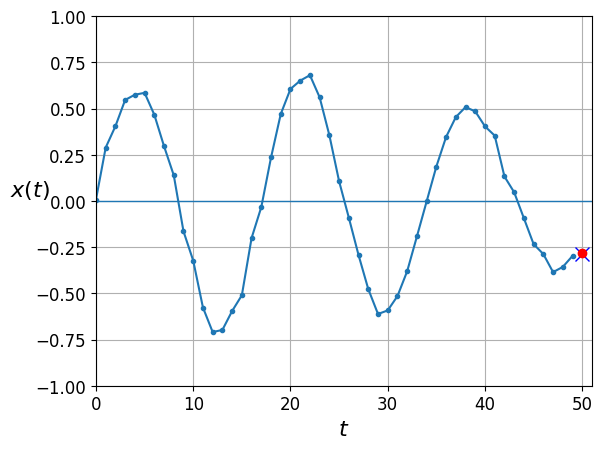

In [16]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_test)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

#**Deep RNNs**

- Un modelo profundo de RNN contiene $L$ capas ocultas.

- Sobre cada capa oculta, el estado oculto es actualizado y se pasa al siguiente instante de tiempo de la capa actual y de la capa siguiente:

![deeprnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/deeprnn.png?raw=1)

- El modelo recurrente profundo se define entonces como:

$$\mathbf{H}^{(l)}_t = \phi_l\left(\mathbf{H}^{(l-1)}_t \mathbf{W}^{(l)}+\mathbf{H}^{(l)}_{t-1}\mathbf{S}^{(l)} + \mathbf{b}^{(l)}\right),$$

donde $\mathbf{W}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_l},$ $\mathbf{S}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_{l-1}},$ $\mathbf{b}\in\mathbb{R}^{h_l}$ y $\phi_l(\cdot)$ es una función de activación no lineal. $\mathbf{H}^{(0)}_t=\mathbf{X}_t$

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto en la capa oculta $L$:

$$\mathbf{O}_t = \mathbf{H}^{(L)}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h_L\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$


**Nota:** para aplicar la capa densa de la salida, se puede utilizar una capa `SimpleRNN(1)` con una neurona, o una capa densa aplicada desde la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para preservar la temporalidad de los datos.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, None, 20)       │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282 (5.01 KB)

 Trainable params: 1,282 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

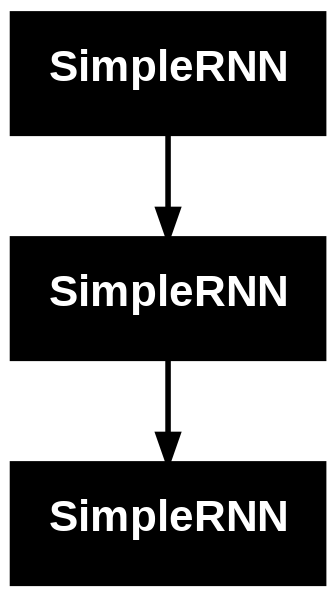

In [17]:
#-------------------------------------------------------------------------------
# definimos el modelo Deep RNN como un stack de SimpleRNN-----------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1,activation='linear')
    ])
#-------------------------------------------------------------------------------
# pintamos el diagrama de bloques del modelo
model.summary()
tf.keras.utils.plot_model(model)
#-------------------------------------------------------------------------------

#**Ejercicio 2**

- Para el modelo definido, determine los tamaños de las matrices y vectores de bias en cada capa.

**Nota**: Utilice el método `model.layers[l].get_weights()`

In [18]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    print(f"\nCapa {i}: {layer.name}")
    if len(weights) == 3: # Capas de SimpleRNN tienen 3 tensores de pesos
        print(f"  Matriz de Entrada (Pesos de Entrada hacia Primer Estado Oculto): {weights[0].shape}")
        print(f"  Matriz Recurrente (Pesos de Estado Oculto Previo hacia Estado Oculto Actual): {weights[1].shape}")
        print(f"  Vector de Sesgos (Estado Oculto): {weights[2].shape}")
    elif len(weights) == 2: # Capas Densas tienen 2 tensores de pesos
        print(f"  Matriz de Pesos: {weights[0].shape}")
        print(f"  Vector de Sesgos: {weights[1].shape}")
    else:
        print(f"  Número Inesperado de Pesos: {len(weights)}")



Capa 0: simple_rnn_1
  Matriz de Entrada (Pesos de Entrada hacia Primer Estado Oculto): (1, 20)
  Matriz Recurrente (Pesos de Estado Oculto Previo hacia Estado Oculto Actual): (20, 20)
  Vector de Sesgos (Estado Oculto): (20,)

Capa 1: simple_rnn_2
  Matriz de Entrada (Pesos de Entrada hacia Primer Estado Oculto): (20, 20)
  Matriz Recurrente (Pesos de Estado Oculto Previo hacia Estado Oculto Actual): (20, 20)
  Vector de Sesgos (Estado Oculto): (20,)

Capa 2: simple_rnn_3
  Matriz de Entrada (Pesos de Entrada hacia Primer Estado Oculto): (20, 1)
  Matriz Recurrente (Pesos de Estado Oculto Previo hacia Estado Oculto Actual): (1, 1)
  Vector de Sesgos (Estado Oculto): (1,)


In [19]:
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0933 - val_loss: 0.0076
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0065 - val_loss: 0.0040
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

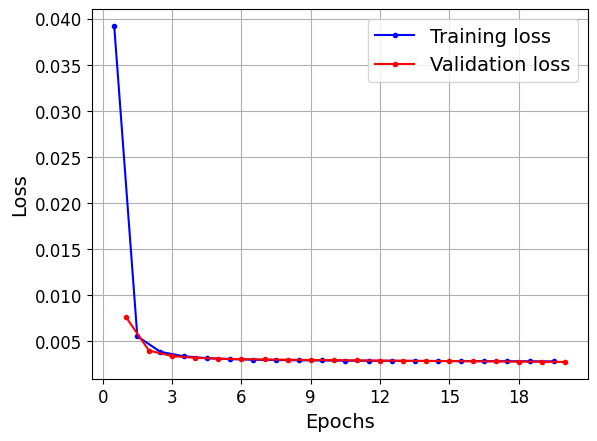

In [20]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [21]:
y_train.shape

(7000, 1)

In [23]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
#print('MSE:',np.mean(keras.losses.mean_squared_error(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------
y_pred.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(1000, 1)

Graficamos el performance de la Deep RNN

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


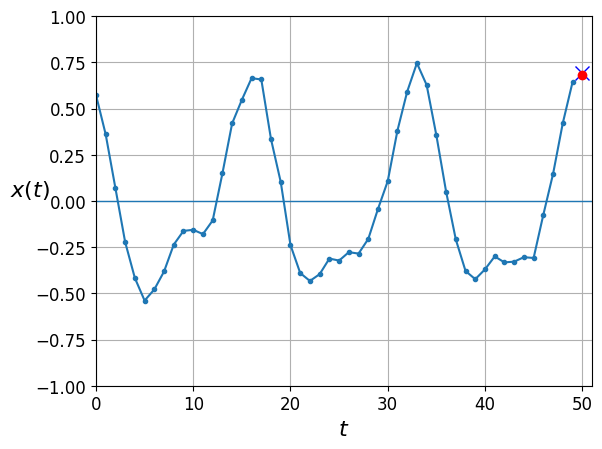

In [24]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_valid)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_valid[2, :, 0], y_valid[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

#**Predicir un horizonte más lejano**

- Si concatenamos las predicciones de a una muestra, para generar salidas con horizontes más lejanos, podemos estar propangando el error!

In [25]:
#-------------------------------------------------------------------------------
# definimos nueva semilla aleatoria---------------------------------------------
np.random.seed(43) #
#-------------------------------------------------------------------------------
# generamos nueva series de tiempo----------------------------------------------
series       = generate_time_series(1, n_steps + 10)     # horizonte de 10 valores en el tiempo
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X            = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
Y_pred = X[:, n_steps:]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [26]:
#-------------------------------------------------------------------------------
# observamos nuevas dimensiones de Y_pred---------------------------------------
Y_pred.shape #horizonte de 10 valores en el tiempo
#-------------------------------------------------------------------------------

(1, 10, 1)

In [56]:
#-------------------------------------------------------------------------------
# definimos función para pintar forecast----------------------------------------
def plot_multiple_forecasts(X, Y, Y_pred, model_name=None, horizon=None, save_dir="/content/"):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

    # Save if requested
    if save_dir is not None:
      os.makedirs(save_dir, exist_ok=True)
      fname = f"{model_name}_forecast_h{horizon}.png" if model_name and horizon else "forecast.png"
      fpath = os.path.join(save_dir, fname)
      plt.savefig(fpath, dpi=150, bbox_inches="tight")
      print(f"✅ Saved forecast plot at: {fpath}")

    plt.close()  # prevents inline flooding in notebooks
#-------------------------------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

✅ Saved forecast plot at: /content/forecast.png


- Lo mejor es entrenar un modelo que incluya como salida target los siguientes $T$ valores a predicir en el horizonte.

- Se requiere entonces generar nuevamente la secuencia con $T-1$ pasos más en el tiempo.

In [28]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
print('Series dimension:',series.shape)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, Y_train.shape)
print('Valid dimensions:',X_valid.shape, Y_valid.shape)
print('Test dimensions:',X_test.shape, Y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 60, 1)
Train dimensions: (7000, 50, 1) (7000, 10)
Valid dimensions: (2000, 50, 1) (2000, 10)
Test dimensions: (1000, 50, 1) (1000, 10)


Predicción de los siguientes 10 valores (uno a uno y concatenar):

In [29]:
#-------------------------------------------------------------------------------
# realizamos predicción usando modelo Deep RNN----------------------------------
del X
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
# obtenemos las predicciones de los siguientes 10 valores-----------------------
Y_pred = X[:, n_steps:, 0]
#-------------------------------------------------------------------------------
print('Y_pred dimensions:', Y_pred.shape)
#-------------------------------------------------------------------------------

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Y_pred dimensions: (2000, 10)


- Error de predicción con horizontes mayores a 1 concatenando salidas:

In [30]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_valid, Y_pred))*100,'%')
#-------------------------------------------------------------------------------

2.7624664 %


Ahora se crea una RNN que permita predecir los siguientes 10 valores en una sola evaluación (predicción multi-salida):

In [31]:
#-------------------------------------------------------------------------------
# definimos semillas aleatorias-------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
# definimos el modelo secuencial multi-salida-----------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10) # capa densa para estimar los siguientes 10 valores
])
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0984 - val_loss: 0.0299
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0269 - val_loss: 0.0175
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0165 - val_loss: 0.0141
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0135 - val_loss: 0.0125
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0121 - val_loss: 0.0114
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 

In [32]:
#-------------------------------------------------------------------------------
# generamos nuevos datos, con nueva semilla aleatoria---------------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva serie de tiempo-----------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
#-------------------------------------------------------------------------------
print('X_new dimensions:',X_new.shape)
print('Y_new dimensions:',Y_new.shape)
#-------------------------------------------------------------------------------
# hacemos predicción de los 10 últimos valores----------------------------------
Y_pred       = model.predict(X_new)[..., np.newaxis]
print('Y_pred dimensions:',Y_pred.shape)
#-------------------------------------------------------------------------------

X_new dimensions: (1, 50, 1)
Y_new dimensions: (1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Y_pred dimensions: (1, 10, 1)


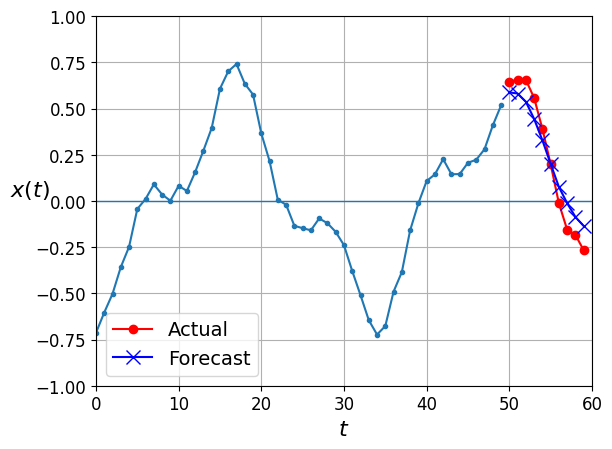

In [33]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- El error de predicción mejora:

In [34]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

0.94817597 %


#**El problema de las dependencias a largo plazo**

- Uno de los atractivos de los RNN es la idea de conectar la información anterior a la tarea actual. Si los RNN pudieran hacer esto, serían extremadamente útiles.

- A veces, solo necesitamos mirar información reciente para realizar la tarea actual.

- Por ejemplo, considere un modelo de lenguaje que intenta predecir la siguiente palabra basándose en las anteriores. Si estamos tratando de predecir la última palabra en la oración:

 "las nubes están en el cielo",

no necesitamos ningún contexto adicional; es bastante obvio que la siguiente palabra será **cielo**.

- En tales casos, donde la brecha entre la información relevante y el lugar que se necesita es pequeña, los RNN pueden aprender a usar la información del pasado.

![rnn_corto](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_corto.png?raw=1)

- Pero también hay casos en los que necesitamos más contexto. Considere intentar predecir la última palabra del texto:

"Crecí en Francia ... hablo francés con fluidez",

la información reciente sugiere que la siguiente palabra es probablemente el **nombre de un idioma**, pero si queremos delimitar qué idioma, necesitamos el contexto de Francia, desde más atrás.

- Entonces, la brecha entre la información relevante y el punto donde se necesita puede ser grande.

![rnn_largo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_largo.png?raw=1)

- En teoría, los RNN son capaces de manejar tales "dependencias a largo plazo". Lamentablemente, en la práctica, las RNN no parecen ser capaces de aprenderlos.

#**[LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/): Long short term memory**

- La LSTM pretende aprender dependencias largas.

- En general, en LSTM, y su extensión GRU, buscan crear mecanismos que permitan identificar cuando el estado oculto debe ser actualizado y cuando reseteado.

- A diferencia de una capa RNN simple, las LSTMs presenta cuatro (4) capas interactuando:


![lstm](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/lstm.png?raw=1)

con:

$$\mathbf{I}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xi}+\mathbf{H}_{t-1}\mathbf{W}_{hi}+\mathbf{b}_i\right)$$
$$\mathbf{F}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xf}+\mathbf{H}_{t-1}\mathbf{W}_{hf}+\mathbf{b}_f\right)$$
$$\mathbf{O}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xo}+\mathbf{H}_{t-1}\mathbf{W}_{ho}+\mathbf{b}_o\right)$$
$$\tilde{\mathbf{C}}_t = \tanh\left(\mathbf{X}_t\mathbf{W}_{xc}+\mathbf{H}_{t-1}\mathbf{W}_{hc}+\mathbf{b}_c\right)$$
$${\mathbf{C}}_t = \mathbf{F}_t \odot \mathbf{C}_{t-1} + \mathbf{I}_t \odot \tilde{\mathbf{C}}_t $$
$${\mathbf{H}}_t = \mathbf{O}_t \odot \tanh{(\mathbf{C}_{t})} $$


donde $\mathbf{W}_{xi},\mathbf{W}_{xf},\mathbf{W}_{xo}, \mathbf{W}_{xc}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hi},\mathbf{W}_{hf},\mathbf{W}_{ho},\mathbf{W}_{hc}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{i},\mathbf{b}_{f},\mathbf{b}_{o}, \mathbf{b}_{c}\in\mathbb{R}^{h}$.

- $\mathbf{I}_t$ busca codificar "cuanto" considerar de los datos nuevos y $\mathbf{F}_t$ que tando retenemos de los datos del pasado.

- Si la compuerta de salida se aproxima a 1, pasamos toda la información de la memoría al predictor, pero, si la compuerta de la salida aproxima a 0, se retiene la información en la celda de memoría.


In [35]:
#-------------------------------------------------------------------------------
# generamos los datos-----------------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
# generamos series de tiempo----------------------------------------------------
n_steps = 50
series  = generate_time_series(10000, n_steps + 10)
print('Series dimensions:',series.shape)
#-------------------------------------------------------------------------------
# partimos los datos en train/valid/test----------------------------------------
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test  = series[9000:, :n_steps]
print('X_train dimensions:',X_train.shape)
print('X_valid dimensions:',X_valid.shape)
print('X_test dimensions:',X_test.shape)
#-------------------------------------------------------------------------------
# definimos nuevos Y------------------------------------------------------------
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
print('Y dimensions:',Y.shape)
#-------------------------------------------------------------------------------
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test  = Y[9000:]
#-------------------------------------------------------------------------------
print('Y_train dimensions:', Y_train.shape)
print('Y_valid dimensions:',Y_valid.shape)
print('Y_test dimensions:',Y_test.shape)
#-------------------------------------------------------------------------------

Series dimensions: (10000, 60, 1)
X_train dimensions: (7000, 50, 1)
X_valid dimensions: (2000, 50, 1)
X_test dimensions: (1000, 50, 1)
Y dimensions: (10000, 50, 10)
Y_train dimensions: (7000, 50, 10)
Y_valid dimensions: (2000, 50, 10)
Y_test dimensions: (1000, 50, 10)


**Nota**: En la capa de salida se puede utilizar una capa densa de 10 neuronas (horizonte de 10 valores). No obstante, debe aplicarse la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para aplicar la operación densa sobre cada tramo de tiempo.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 20)       │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 20)       │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, None, 10)       │           210 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,250 (20.51 KB)

 Trainable params: 5,250 (20.51 KB)

 Non-trainable params: 0 (0.00 B)

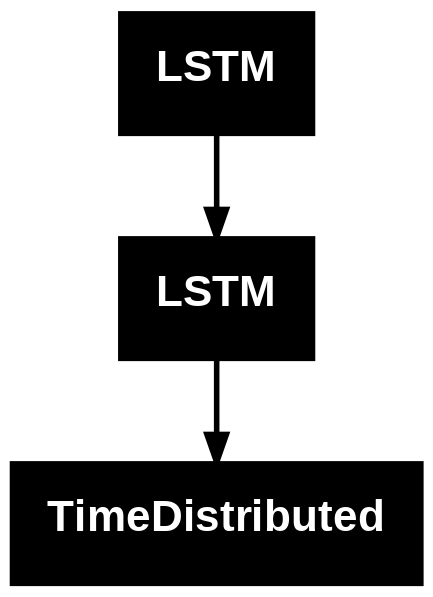

In [36]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mse(Y_true[:, -1], Y_pred[:, -1])
#-------------------------------------------------------------------------------
# definimos el modelo secuencial con 2 capas LSTM-------------------------------
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.summary()
tf.keras.utils.plot_model(model)

In [37]:
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
#-------------------------------------------------------------------------------
# entrenamos y validamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - last_time_step_mse: 0.0937 - loss: 0.1042 - val_last_time_step_mse: 0.0320 - val_loss: 0.0531
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0279 - loss: 0.0492 - val_last_time_step_mse: 0.0189 - val_loss: 0.0418
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0188 - loss: 0.0403 - val_last_time_step_mse: 0.0170 - val_loss: 0.0379
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - last_time_step_mse: 0.0162 - loss: 0.0366 - val_last_time_step_mse: 0.0151 - val_loss: 0.0353
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0149 - loss: 0.0344 - val_last_time_step_mse: 0.0140 - val_loss: 0.0335
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0139 - loss: 0.0328 - val_last_time_step_mse: 0.0131 - val_loss: 0.0320
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0131 - loss: 0.0314 - val_las

In [38]:
#-------------------------------------------------------------------------------
# evaluamos el modelo sobre los datos de Valid----------------------------------
model.evaluate(X_test, Y_test)
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - last_time_step_mse: 0.0087 - loss: 0.0237


[0.02386891096830368, 0.008550217375159264]

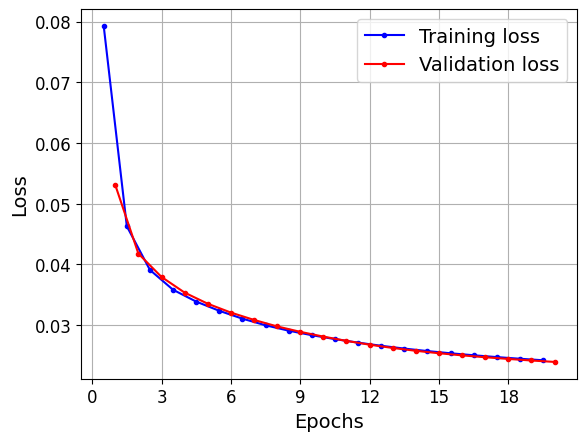

In [39]:
#-------------------------------------------------------------------------------
# observamos las curvas de aprendizaje del modelo-------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [40]:
#-------------------------------------------------------------------------------
# generamos una nueva serie de tiempo para testear el modelo--------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva sample--------------------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
#-------------------------------------------------------------------------------
# realizamos predicción---------------------------------------------------------
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


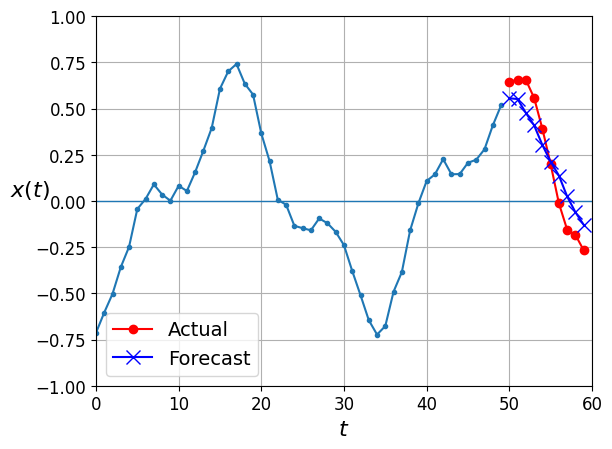

In [41]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- Rendimientos similares a las RNN con horizonte lejano.
- Es preciso sintonizar número de capas e hiperparámetros para aprovechar todas las ventajas de LSTM.

In [42]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

1.700398 %


#**[GRU](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be): Gated Recurrent Unit**

- La GRU puede entenderse como una extensión de la capa LSTM para evitar problemas de convergencia en el gradiente.

$$\mathbf{R}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xr}+\mathbf{H}_{t-1}\mathbf{W}_{hr}+\mathbf{b}_r\right)$$
$$\mathbf{Z}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xz}+\mathbf{H}_{t-1}\mathbf{W}_{hz}+\mathbf{b}_z\right)$$
$$\tilde{\mathbf{H}}_t = \tanh(\mathbf{X}_t\mathbf{W}_{xh}+(\mathbf{R}_t\odot\mathbf{H}_{t-1})\mathbf{W}_{hh}+\mathbf{b}_h)$$
$${\mathbf{H}}_t = \mathbf{Z}_t\odot\mathbf{H}_{t-1}+(1-\mathbf{Z}_t)\odot\tilde{\mathbf{H}}_t$$

donde $\mathbf{W}_{xh},\mathbf{W}_{xz},\mathbf{W}_{xh}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hr},\mathbf{W}_{hz},\mathbf{W}_{hh}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{r},\mathbf{b}_{z},\mathbf{b}_{h}\in\mathbb{R}^{h}$.

![gru](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/gru.png?raw=1)

- Si las entradas de $\mathbf{R}_t$ se acercan a 1, el modelo se convierte en una RNN simple. Para valores en $\mathbf{R}_t$ cercanos a 0, el estado oculto "candidato" se cácula como un MLP sobre $\mathbf{X}_t$, cualquier estado oculto anterior es "reseteado".

- Además, si los elementos de la compuerta de actualización $\mathbf{Z}_t$ son cercanos a 1, se mantiene el estado anterior en la capa, de lo contrario el nuevo estado $\mathbf{H}_t$ "acepta" el estado candidato $\tilde{\mathbf{H}}_t.$

- Lo anterior permite mitigar el efecto del desvanecimiento del gradiente de las RNN simples, codificando mejor dependencias en series con relaciones "relativamente grandes" en el tiempo.



In [43]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - last_time_step_mse: 0.0957 - loss: 0.1017 - val_last_time_step_mse: 0.0421 - val_loss: 0.0532
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0408 - loss: 0.0507 - val_last_time_step_mse: 0.0345 - val_loss: 0.0457
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - last_time_step_mse: 0.0347 - loss: 0.0448 - val_last_time_step_mse: 0.0291 - val_loss: 0.0414
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - last_time_step_mse: 0.0300 - loss: 0.0408 - val_last_time_step_mse: 0.0237 - val_loss: 0.0368
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0241 - loss: 0.0361 - val_last_time_step_mse: 0.0171 - val_loss: 0.0320
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - last_time_step_mse: 0.0169 - loss: 0.0317 - val_last_time_step_mse: 0.0145 - val_loss: 0.0297
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - last_time_step_mse: 0.0142 - loss: 0.0294 - val_last_time_ste

In [44]:
model.evaluate(X_valid, Y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - last_time_step_mse: 0.0072 - loss: 0.0211


[0.02117522619664669, 0.007173232734203339]

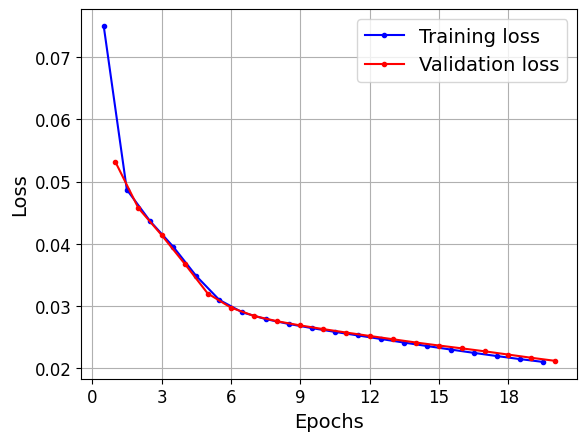

In [45]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [46]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


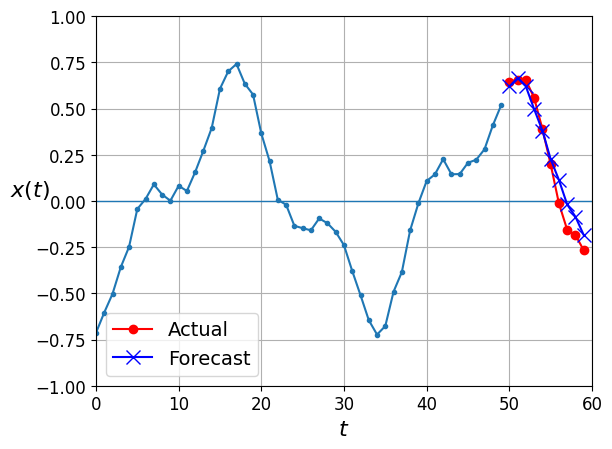

In [47]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [48]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

0.57857007 %


#**Ejercicio 3:**

- Consulte en qué consisten las capas Conv1D y cómo pueden aplicarse para modelar series temporales (Ver capa [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/) y [ejemplo](https://boostedml.com/2020/04/1-d-convolutional-neural-networks-for-time-series-basic-intuition.html)).

- Realice una comparación entre las redes tipo RNN simple, LSTM, GRU y Conv1D en terminos de la capacidad de predicción en términos del mse y el mae, en los datos simulados para diferentes horizontes: $\{1,2,3,\dots,15\}$

Train: (7000, 100, 1)  Valid: (2000, 100, 1)  Test: (1000, 100, 1)

--- Horizon: 1 steps ---
Training SimpleRNN...
SimpleRNN  | MSE: 0.00209 | MAE: 0.03656
Graficando predicción del modelo SimpleRNN para 1 pasos...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
✅ Saved forecast plot at: /content/SimpleRNN_forecast_h1.png
Training LSTM...
LSTM       | MSE: 0.00212 | MAE: 0.03651
Graficando predicción del modelo LSTM para 1 pasos...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
✅ Saved forecast plot at: /content/LSTM_forecast_h1.png
Training GRU...
GRU        | MSE: 0.00231 | MAE: 0.03848
Graficando predicción del modelo GRU para 1 pasos...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
✅ Saved forecast plot at: /content/GRU_forecast_h1.png
Training Conv1D...
Conv1D     | MSE: 0.06790 | MAE: 0.21093
Graficando predicción del modelo Conv1D para 1 pasos...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
✅ Saved forecast plot at: /content/Conv1D_forecast_h1.png

--- Horizon: 2 steps ---
Training SimpleRNN...
SimpleRNN  | M

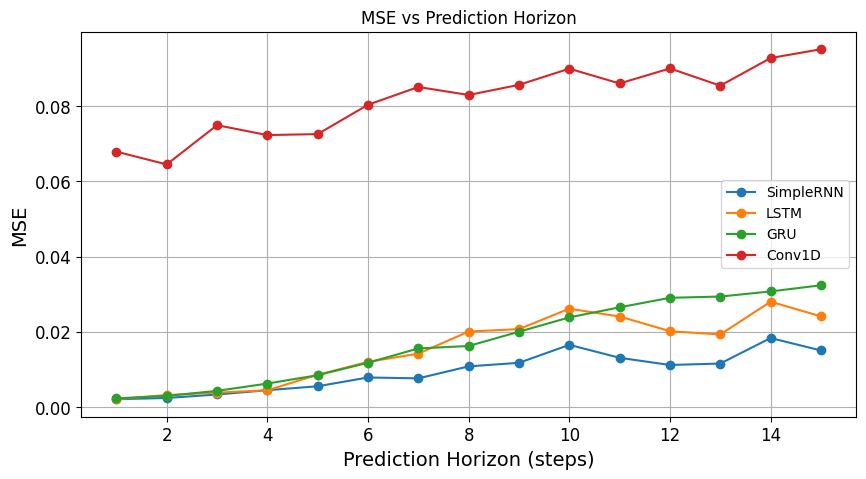

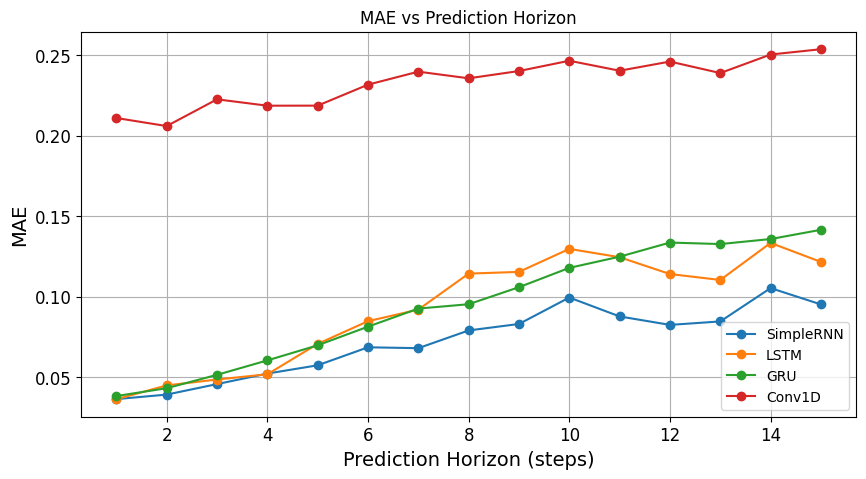

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics

# ===== 1. Generación de Datos =====
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time   = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # noise
    return series[..., np.newaxis].astype(np.float32)

n_steps    = 100
batch_size = 10000
series     = generate_time_series(batch_size, n_steps + 15)

X_train, y_train = series[:7000, :n_steps], series[:7000, -15:]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -15:]
X_test,  y_test  = series[9000:, :n_steps], series[9000:, -15:]
print("Train:", X_train.shape, " Valid:", X_valid.shape, " Test:", X_test.shape)

# ===== 1. Generación de Modelos =====
def build_simpleRNN(window):
    inp = layers.Input(shape=(window,1))
    x = layers.SimpleRNN(64, return_sequences=False)(inp)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1)(x)
    return models.Model(inp, out)

def build_LSTM(window):
    inp = layers.Input(shape=(window,1))
    x = layers.LSTM(64, return_sequences=False)(inp)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1)(x)
    return models.Model(inp, out)

def build_GRU(window):
    inp = layers.Input(shape=(window,1))
    x = layers.GRU(64, return_sequences=False)(inp)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1)(x)
    return models.Model(inp, out)

def build_Conv1D(window):
    inp = layers.Input(shape=(window,1))
    x = layers.Conv1D(64, kernel_size=5, padding='causal', activation='relu')(inp)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(128, kernel_size=3, activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1)(x)
    return models.Model(inp, out)

model_factories = {
    "SimpleRNN": build_simpleRNN,
    "LSTM": build_LSTM,
    "GRU": build_GRU,
    "Conv1D": build_Conv1D
}

# ===== 3. Función de Entrenamiento y Evaluación =====
def evaluate_models(horizons, model_factories):
  results = {}
  for h in horizons:
    print(f"\n--- Horizon: {h} steps ---")
    # Redefinimos targets (solo los primeros h pasos futuros)
    y_train_h = y_train[:, :h]
    y_valid_h = y_valid[:, :h]
    y_test_h  = y_test[:, :h]
    results[h] = {}

    for mname, builder in model_factories.items():
      print(f"Training {mname}...")
      # Construimos el modelo base con salida de 1
      base_model = builder(n_steps)

      if h > 1:
        # Regresamos a capa previa a la salida
        penultimate_output = base_model.layers[-2].output

        # Construimos nuevo nodo de salida
        new_output = k_layers.Dense(h, name=f"{mname}_multiout_{h}")(penultimate_output)

        # Creamos un nuevo modelo funcional con la misma entrada pero nueva salida
        model = k_models.Model(inputs=base_model.input, outputs=new_output)
      else:
        model = base_model

      # Compilación
      model.compile(
          loss=losses.MeanSquaredError(),
          optimizer=optimizers.Adam(learning_rate=1e-3),
          metrics=[metrics.MeanAbsoluteError()]
          )

      # Entrenamiento
      history = model.fit(
          X_train, y_train_h,
          epochs=10,
          batch_size=512,
          validation_data=(X_valid, y_valid_h),
          verbose=0
          )

      # Evaluación en Test
      eval_res = model.evaluate(X_test, y_test_h, verbose=0)
      mse = float(eval_res[0])
      mae = float(eval_res[1])
      results[h][mname] = {"MSE": mse, "MAE": mae}
      print(f"{mname:10s} | MSE: {mse:.5f} | MAE: {mae:.5f}")

      # Graficar si el horizonte está en la lista solicitada
      if h in [1, 5, 10, 15]:
        print(f"Graficando predicción del modelo {mname} para {h} pasos...")
        X_new = X_test[:1]
        Y_new = y_test[:1, :h]
        Y_pred = model.predict(X_new)
        Y_pred = Y_pred.reshape(Y_new.shape)
        plot_multiple_forecasts(
                    X_new, Y_new[..., np.newaxis], Y_pred[..., np.newaxis],
                    model_name=mname, horizon=h, save_dir="/content"
                )
  return results


# ===== 4. Generación de Experimentos =====
horizons = [i for i in range(1, 16)]
results = evaluate_models(horizons, model_factories)

# ===== 5. Visualización =====
for metric in ["MSE", "MAE"]:
    plt.figure(figsize=(10,5))
    for mname in model_factories.keys():
        values = [results[h][mname][metric] for h in horizons]
        plt.plot(horizons, values, marker='o', label=mname)
    plt.title(f"{metric} vs Prediction Horizon")
    plt.xlabel("Prediction Horizon (steps)")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


**Análisis:**

Los gráficos evidencian que **SimpleRNN** ofrece el mejor rendimiento general, aunque su error aumenta notablemente a medida que aumenta el horizonte de predicción. En comparación, **LSTM** y **GRU** muestran un incremento más notable del error a medida que aumenta el horizonte, lo que sugiere una ligera pérdida de generalización frente a la simplicidad del modelo recurrente básico. Por su parte, **Conv1D** presenta el peor desempeño, con errores altos y crecientes, sin embargo, es de destacar que el aumento de su error es mucho menor al del resto de modelos, cuando es visualizado desde el MAE.

En general, los modelos no generan predicciones robustas, esto también puede ser debido a la creación de modelos propensos al subajuste.

In [62]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_saved_forecasts(save_dir="/content", cols=4):
    """
    Displays all saved forecast plots from the specified directory.

    Args:
        save_dir (str): Directory containing the saved forecast plots.
        cols (int): Number of columns for the grid display.
    """
    files = sorted([f for f in os.listdir(save_dir) if f.endswith('.png')])
    n_images = len(files)
    if n_images == 0:
        print("⚠️ No forecast images found in directory:", save_dir)
        return

    rows = (n_images + cols - 1) // cols
    plt.figure(figsize=(5 * cols, 4 * rows))

    for i, fname in enumerate(files):
        img_path = os.path.join(save_dir, fname)
        img = mpimg.imread(img_path)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(fname.replace("_", "\n"), fontsize=10)

    plt.tight_layout()
    plt.show()
    print(f"✅ Displayed {n_images} forecast plots from '{save_dir}'.")

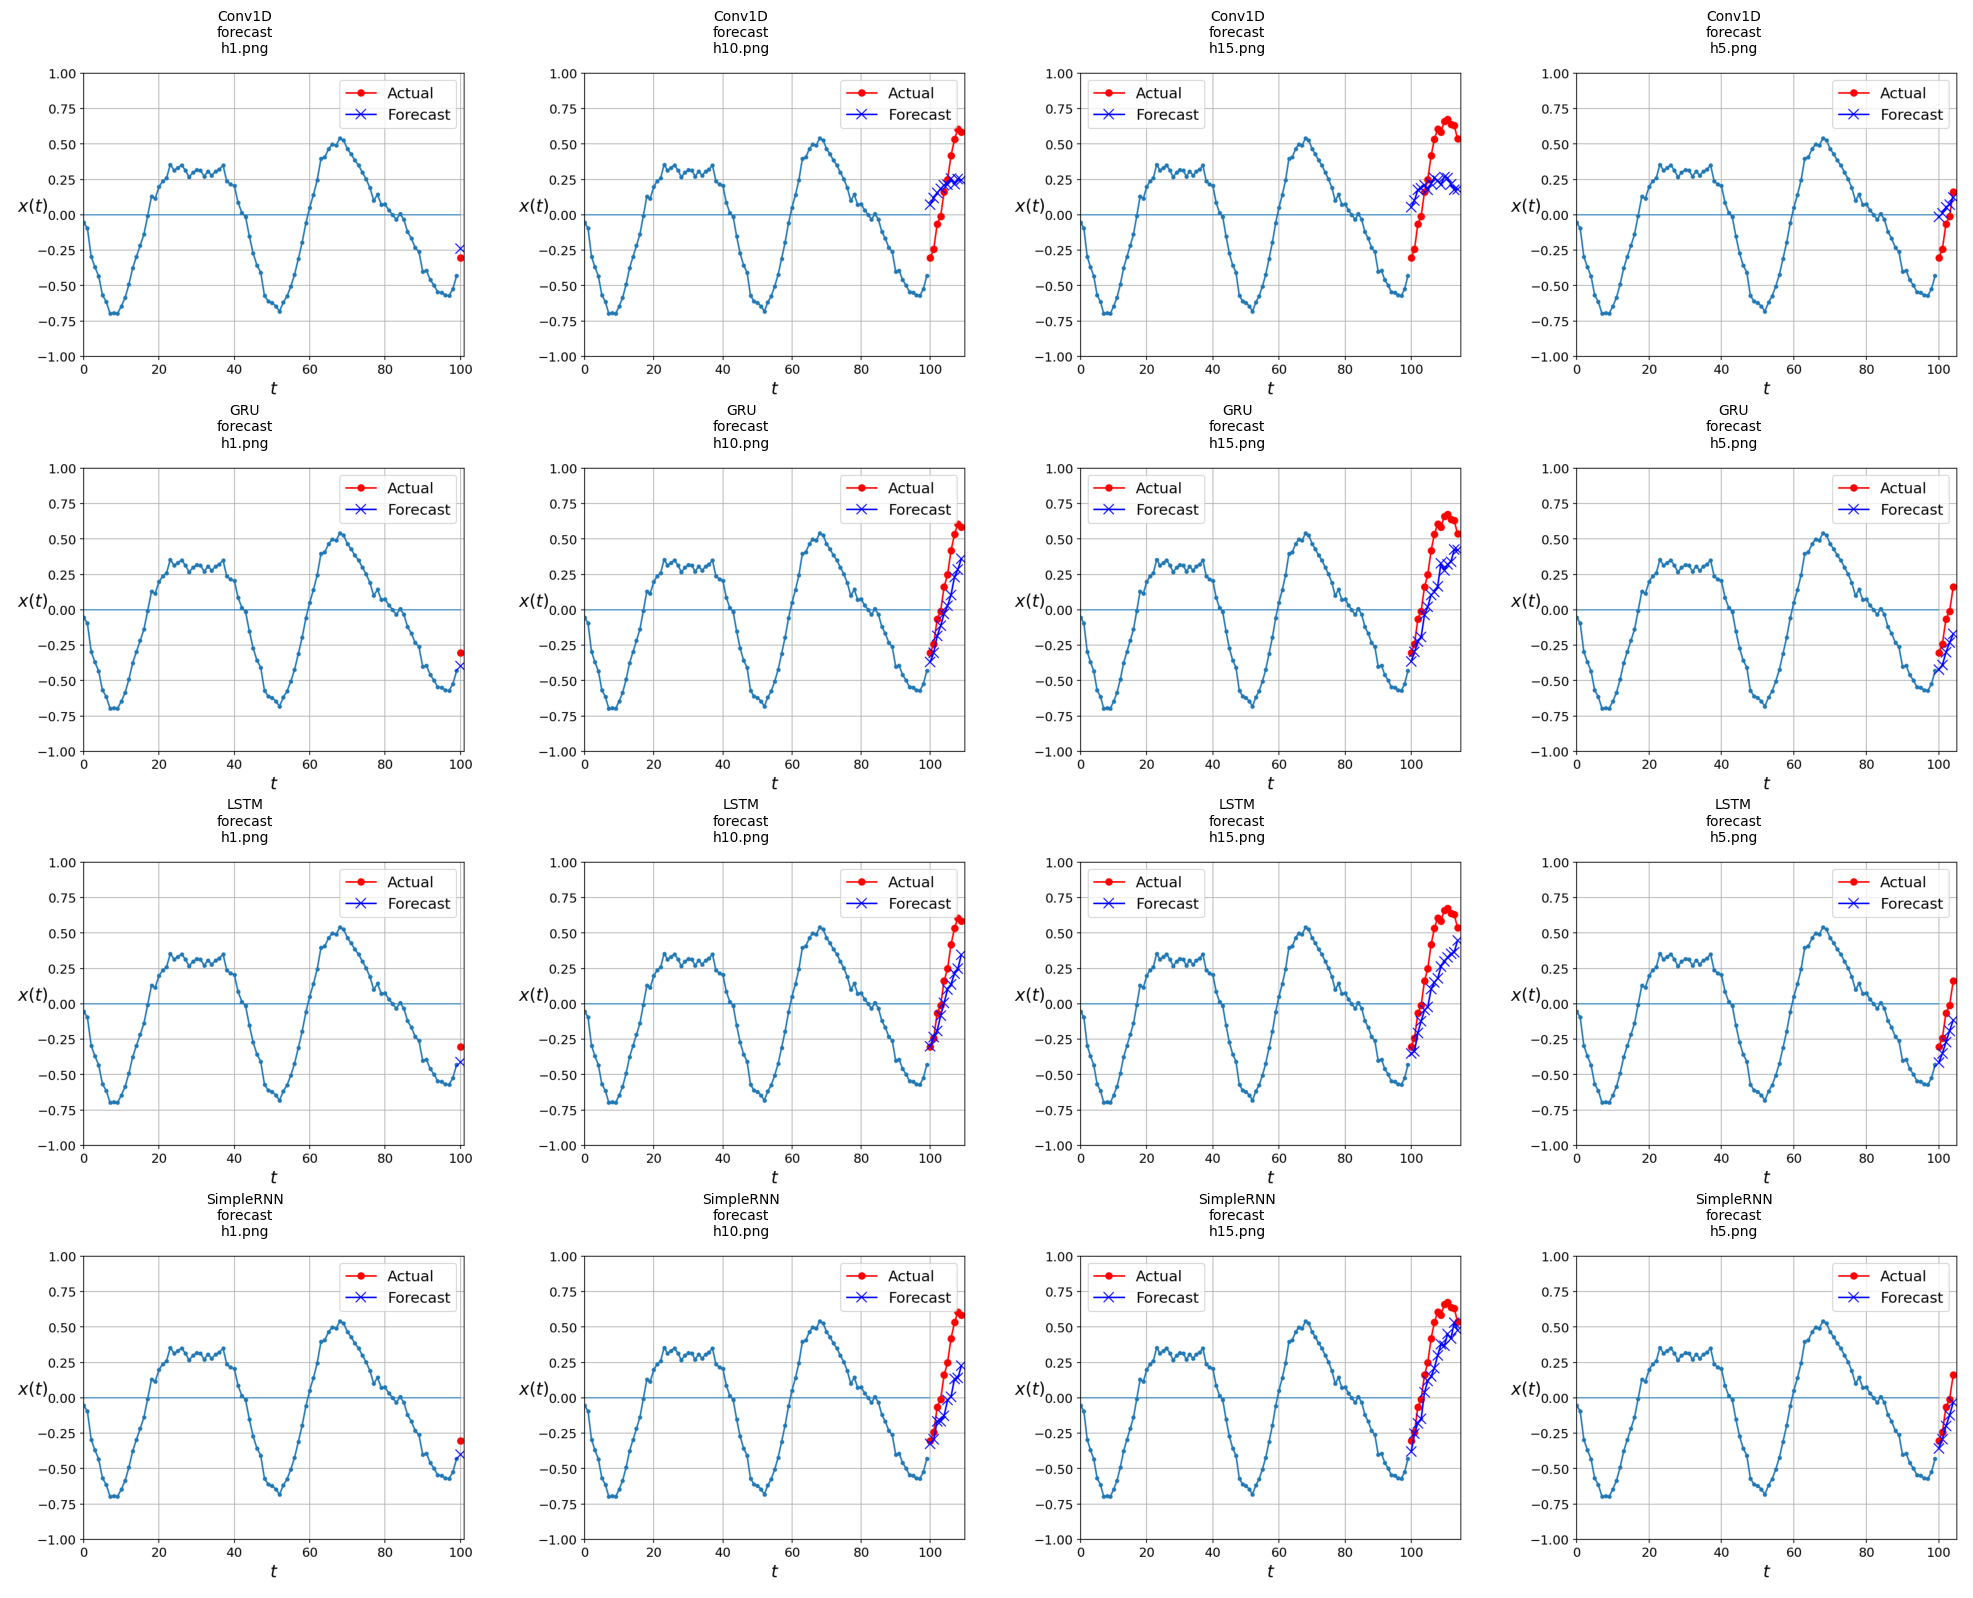

✅ Displayed 16 forecast plots from '/content'.


In [63]:
show_saved_forecasts()